<a href="https://colab.research.google.com/github/kkkk-8548/mvp_data_science/blob/main/MVP_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MVP Ciência de Dados**

##**Introdução**

* **Definição e Descrição do Problema:**

Este trabalho explora dados de reservas de hotel para desenvolver uma análise preditiva que permita identificar a probabilidade de cancelamento de reservas em hotéis. Utilizando técnicas de análise de dados e machine learning, busca-se compreender os padrões e fatores que influenciam o comportamento dos clientes no momento da reserva.

A partir das variáveis disponíveis, será possível construir um modelo preditivo capaz de classificar as reservas como honradas ou canceladas.



* **Premissas e Hipóteses**:


O dataset contém informações detalhadas sobre reservas em hotéis, incluindo variáveis como tempo entre a reserva e o check-in (lead time), número de noites, segmento de mercado, políticas de cancelamento, tipo de cliente, entre outros fatores relevantes.
As variáveis disponíveis permitem identificar padrões associados ao cancelamento de reservas, como comportamento do cliente, sazonalidade e dinâmica do mercado.

Os resultados podem ser aplicados para otimizar estratégias comerciais, melhorar a experiência do cliente e aumentar a eficiência operacional dos hotéis.


* **Restrições e Condições dos Dados:**

Os dados possuem informações de diversas reservas entre 2017 e 2018

* **Definição dos Atributos do Dataset:**


> *Booking_ID*: id único da reserva

> *no_of_adults*: número de adultos

> *no_of_children*: número de crianças

> *no_of_weekend_nights*: número de dias no final de semana (sábado ou domingo) que o hóspede ficou hospedado no hotel

> *no_of_week_nights*: número de dias da semana que o hóspede ficou hospedado no hotel

> *type_of_meal_plan*: tipo de refeição que o hospede reservou

> *required_car_parking_space*: se o hóspede solicitou vaga de garagem: (0 - No, 1- Yes)

> *room_type_reserved*: tipo de acomodação reservada pelo hóspede.The values are ciphered (encoded) by INN Hotels.

> *lead_time*: número de dias entre a reserva e a data de check-in

> *arrival_year*: ano da data do check-in

> *arrival_month*: mês da data do check-in

> *arrival_date*: dia do mês do check-in

> *market_segment_type*: segmento de mercado

> *repeated_guest*: o hóspede está retornando?: (0 - No, 1- Yes)

> *no_of_previous_cancellations*: número de reservas que foram cancelas antes da reserva vigente

> *no_of_previous_bookings_not_canceled*: número de reservas que não foram cancelas antes da reserva vigente

> *avg_price_per_room*: preço médio por dia da reserva, os preços das acomodações são dinâmicos (em euro)

> *no_of_special_requests*: número total de solicitações específicas do hóspede (ex. andar alto, vista da acomodação, e etc)

> booking_status: flag indicado se a reserva foi cancelada ou não.

##**Análise dos Dados**

Importação de Bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from joblib import Parallel, delayed

Carregamento do dataset

In [2]:
file_path = 'https://raw.githubusercontent.com/kkkk-8548/mvp_data_science/refs/heads/main/Hotel%20Reservations.csv'
df = pd.read_csv(file_path, sep = ',')

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### **Análise Exploratória de Dados**

Estatísticas Descritiva:


In [3]:
## verificando o tamanho da tabela fato, que é a tabela com dados de geração de energia renovável
df_columns = df.shape[1]
df_data = df.shape[0]

print("Número de colunas:", df_columns)
print("Número de linhas:", df_data)

Número de colunas: 19
Número de linhas: 36275


In [4]:
## tipos de dados das colunas
df.dtypes

,0
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_year,int64


Os tipos dos dados estão corretos então não será necessário ajuste

In [5]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.84,0.52,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.11,0.40,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.81,0.87,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.20,1.41,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.03,0.17,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.23,85.93,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.82,0.38,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.42,3.07,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.60,8.74,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.03,0.16,0.0,0.0,0.00,0.0,1.0


In [6]:
## verificando se há valores faltantes
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


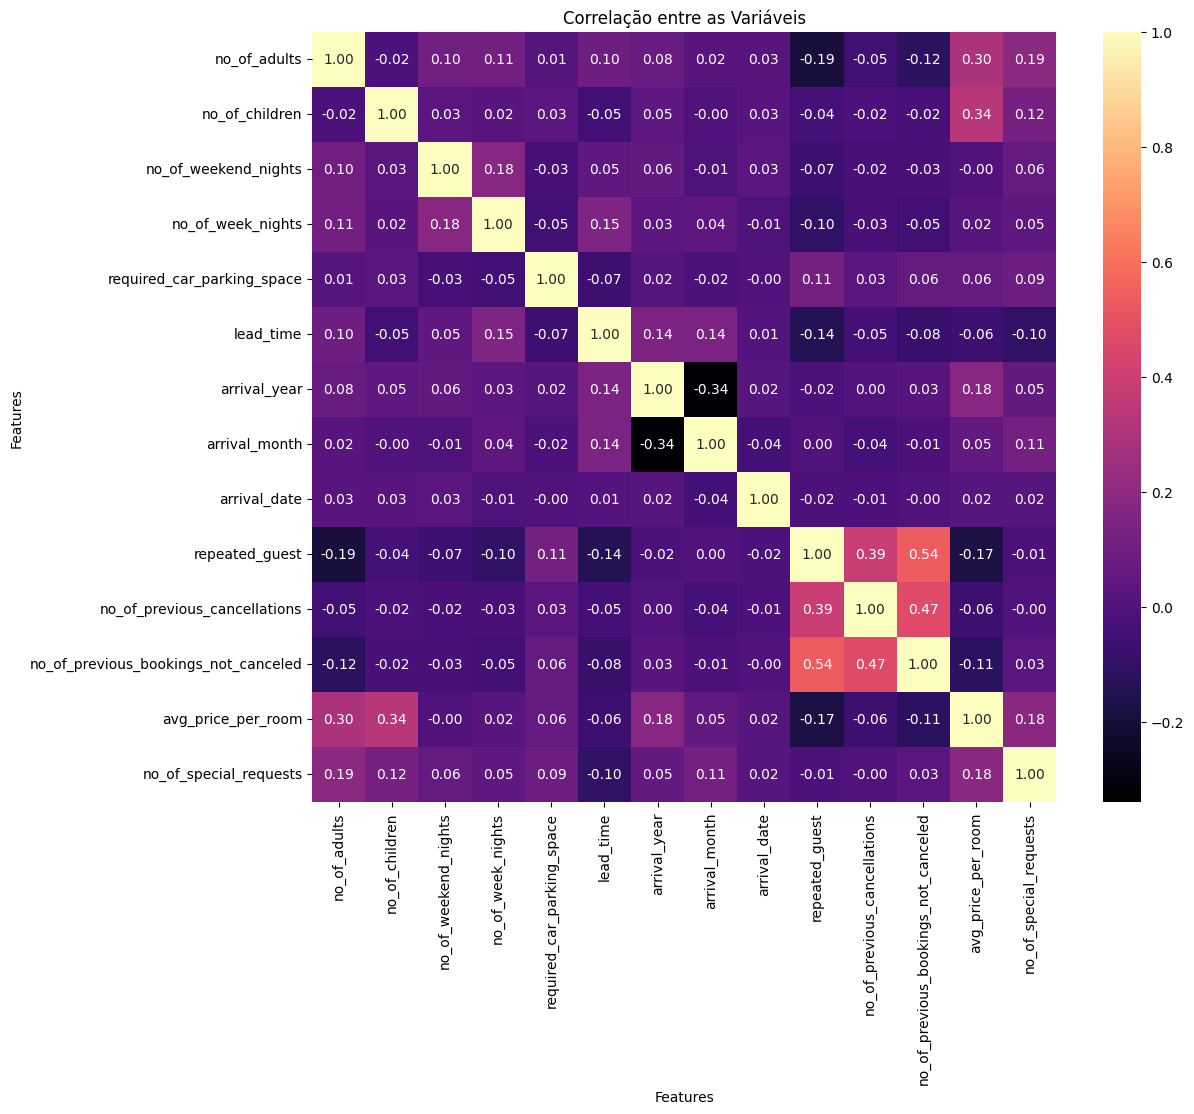

In [7]:
#verificando correlação entre os atributos
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('Correlação entre as Variáveis')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

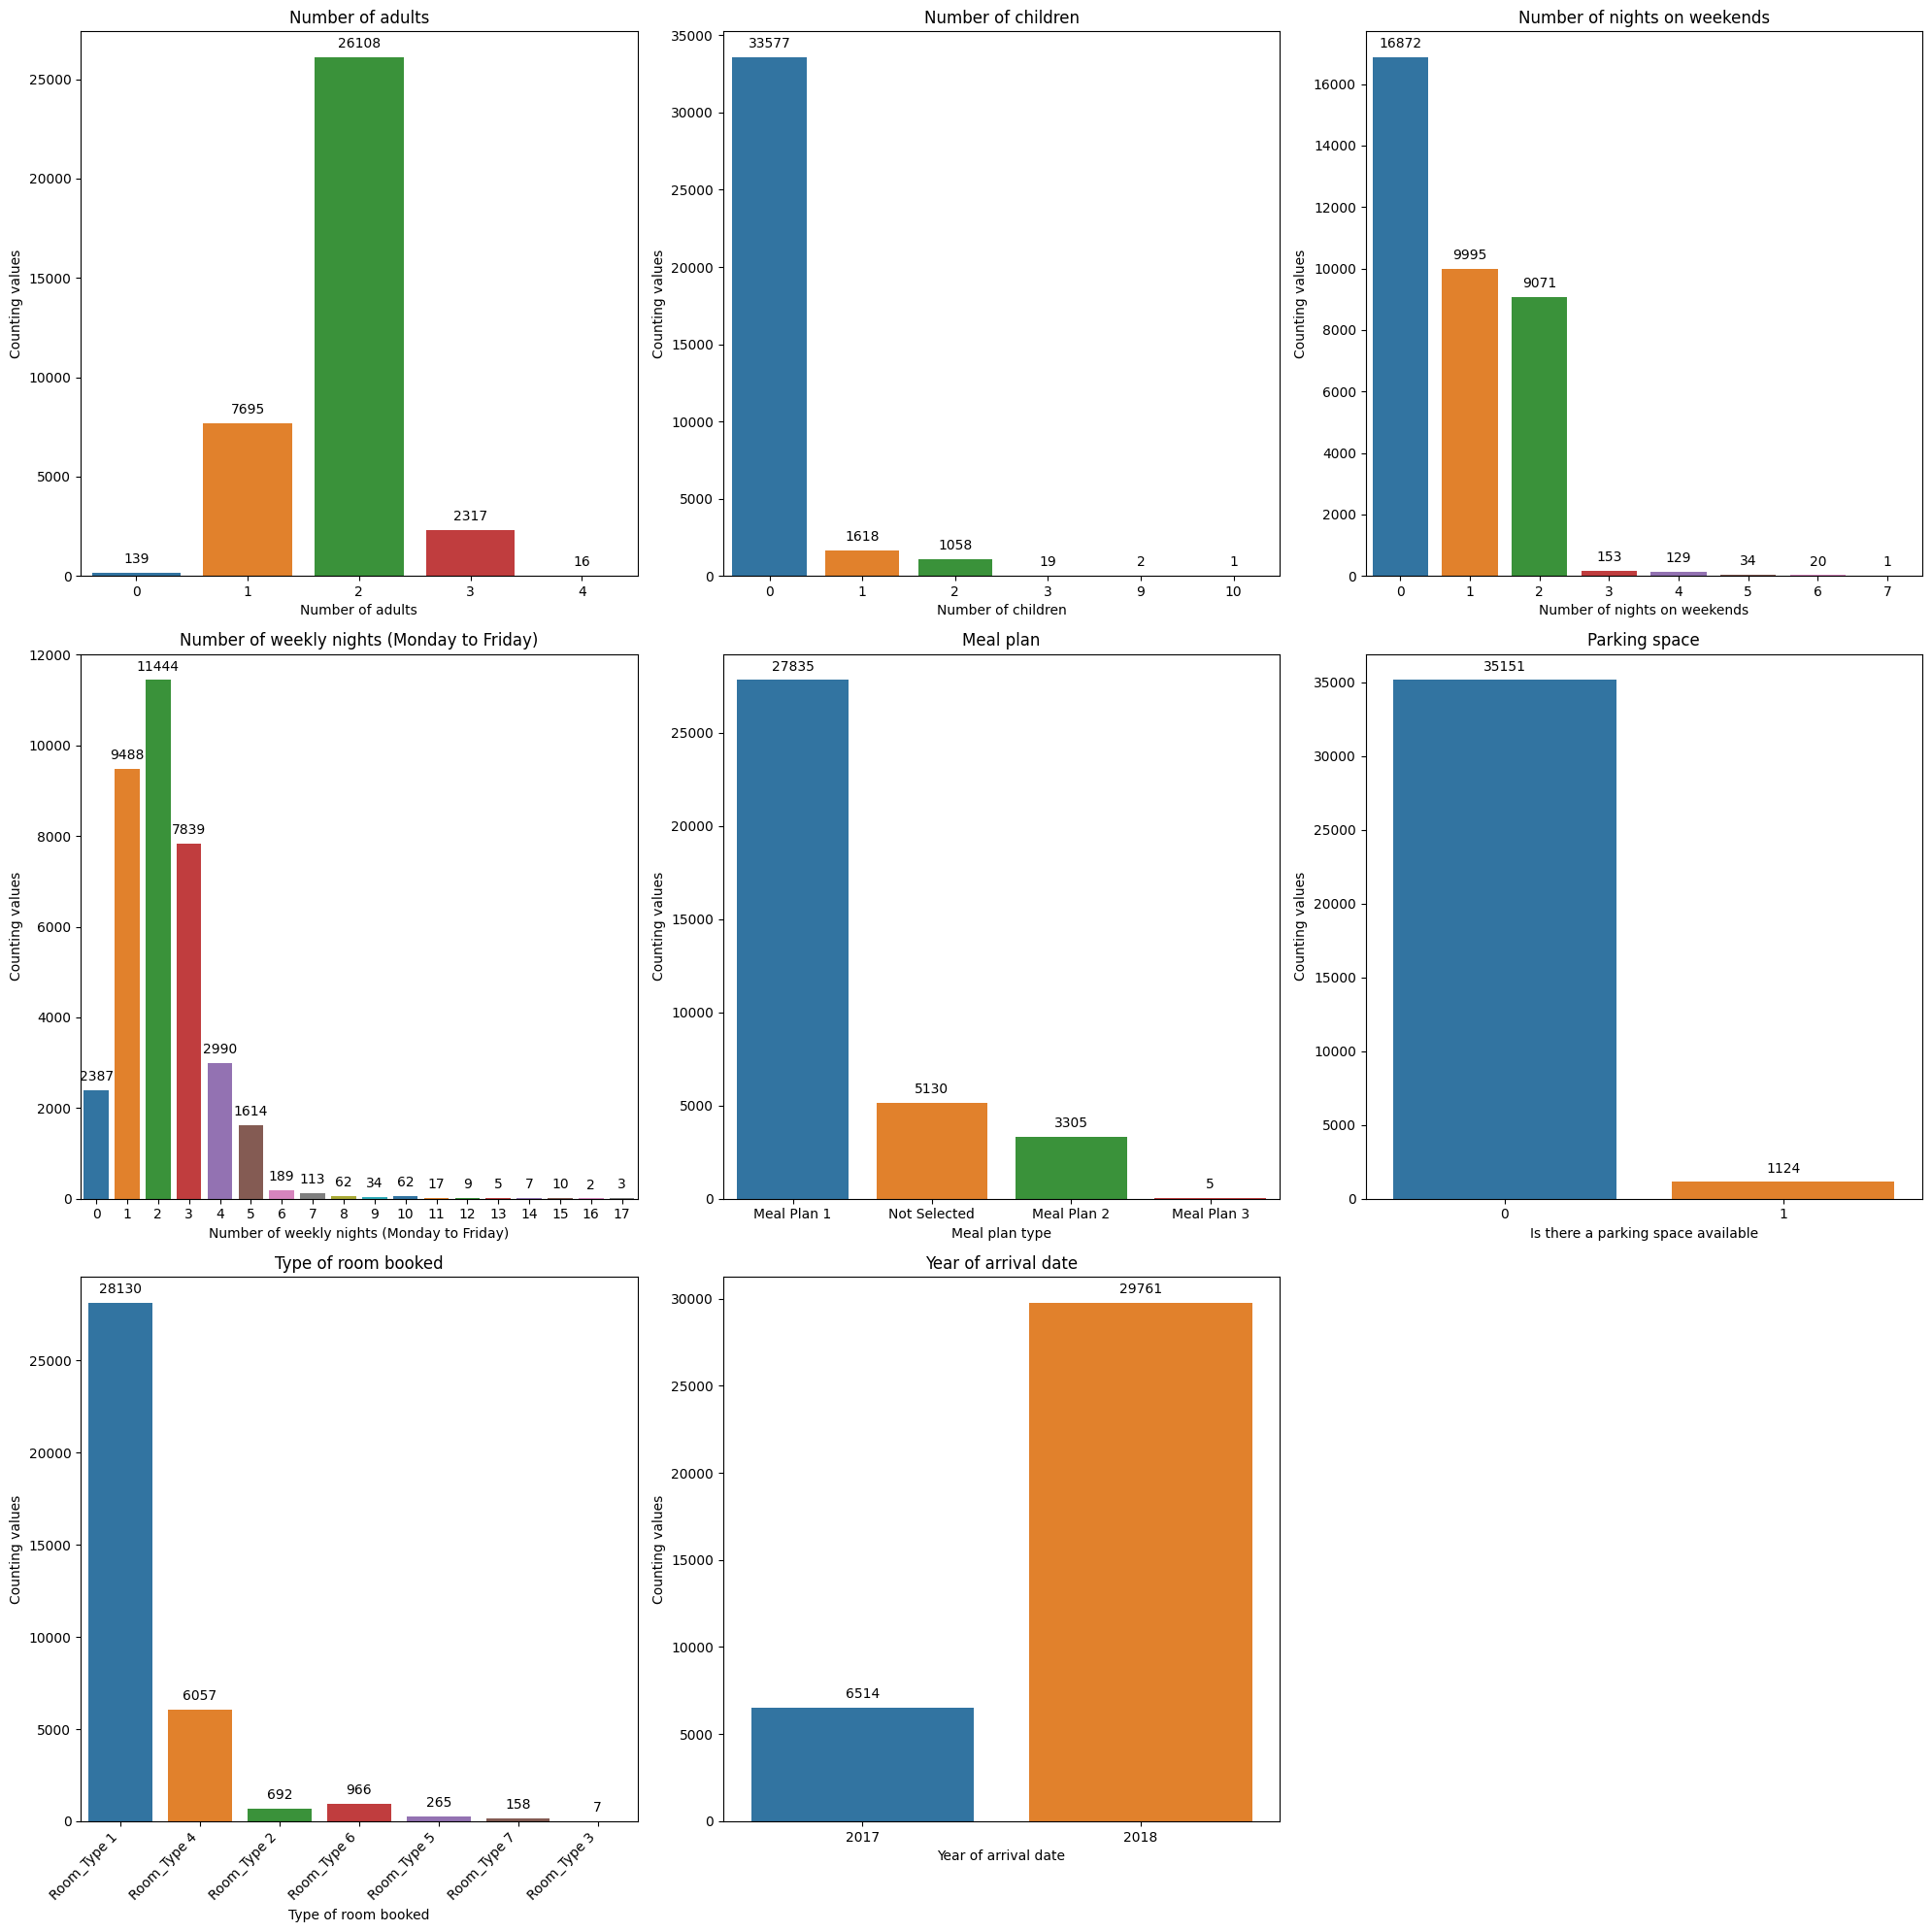

In [8]:
#analisando alguns atributos
def plot_countplots_with_labels(data, columns, titles, xlabels, ylabels, figsize=(20, 20), palette='tab10', cols=3, rotate_columns=None):

    if rotate_columns is None:
        rotate_columns = []

    rows = -(-len(columns) // cols)
    plt.figure(figsize=figsize)

    for i, col in enumerate(columns):
        plt.subplot(rows, cols, i + 1)
        ax = sns.countplot(x=col, hue=col, data=data, palette=palette, legend=False)
        plt.title(titles[i])
        plt.xlabel(xlabels[i])
        plt.ylabel(ylabels[i])

        #inclui na diagonal gráficos cuja descrião se sobrepõe
        if col in rotate_columns:
            plt.xticks(rotation=45, ha='right')

        # Adicionando rótulos de dados
        for p in ax.patches:
            label = int(p.get_height())
            ax.annotate(
                f'{label}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points'
            )

    plt.tight_layout()
    plt.show()

# Exemplo de chamada da função
rotate_columns = ['room_type_reserved']  #necessário rotacionar a descrição desse atributo para uma melhor visualização
# Lista de colunas e seus detalhes
columns = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
    'room_type_reserved', 'arrival_year'
]

titles = [
    'Number of adults', 'Number of children', 'Number of nights on weekends',
    'Number of weekly nights (Monday to Friday)', 'Meal plan', 'Parking space',
    'Type of room booked', 'Year of arrival date'
]

xlabels = [
    'Number of adults', 'Number of children', 'Number of nights on weekends',
    'Number of weekly nights (Monday to Friday)', 'Meal plan type',
    'Is there a parking space available', 'Type of room booked',
    'Year of arrival date'
]

ylabels = ['Counting values'] * len(columns)
plot_countplots_with_labels(df, columns, titles, xlabels, ylabels, rotate_columns=rotate_columns)


### **Pré-processamento dos Dados**

In [9]:
#separando os dados em recursos (X) e variável-alvo (y)
X = df.drop(columns=["booking_status"])
y = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)  # Transformar em variável binária

Separação dos dados do dataset em treino e teste

In [10]:
#dividindo o dataset em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Preparação apenas dos dados de treino a fim de evitar vazamento de dados (data leakage) e deixando os dados de teste mais próximo da realidade do dia a dia da entrada de dados.

In [11]:
#identificando atributos numéricos e categóricos
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns


In [12]:
#realizando o pré-processamento para atributos numéricos
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())
])

#realizando o pré-processamento para atributos categóricos
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("onehot", OneHotEncoder(handle_unknown="ignore"))])

#unindo os pré-processadores em um transformador único
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


Criação de um pipeline que auxilia a assegurar que o processamento dos dados sejam, de fato, aplicados no treino e teste, sem risco de vazamento de dados.

### **Escolha do Modelo**

In [13]:
#treinando com modelos que façam sentido para um modelo de classificação
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),  # Utiliza todos os núcleos do processador
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)  #ativando probabilidade para calcular ROC AUC
}

In [14]:
#listando as métricas de avaliação
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1),
    'roc_auc': 'roc_auc'
}

Avaliação e Validação dos Modelos

In [15]:
#etapa demora cerca de 10 min para rodar pois quis fazer avaliação com algumas métricas com os devidos pipelines dos modelos escolhidos
results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    scores = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=3,  #fazendo o cross-validation com 3 folds
        scoring=scoring_metrics,
        n_jobs=-1
    )

    result = {
        'Model': name,
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1 Score': scores['test_f1'].mean(),
        'ROC AUC': scores['test_roc_auc'].mean()
    }
    results.append(result)

#incluindo os resultados em um dataframe para melhor visual
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Decision Tree,0.872984,0.824023,0.778607,0.800650,0.848790
1,Random Forest,0.882391,0.880520,0.741690,0.805144,0.936834
2,XGBoost,0.887802,0.855467,0.791229,0.822088,0.948965
3,KNN,0.840420,0.772105,0.727703,0.749245,0.891518
4,SVM,0.837871,0.797637,0.677009,0.732374,0.894577


Métricas:

* ROC AUC: Área sob a curva ROC, que mede a habilidade do modelo de distinguir entre as classes (nesse estudo de caso, cancelamento e não cancelamento).

* Recall: Proporção de verdadeiros positivos em relação a todos os exemplos positivos reais. Nesse estudo de caso, avalia a capacidade do modelo de identificar cancelamentos.

* Accuracy: Proporção de previsões corretas em relação ao total de exemplos. Verifica o quanto o modelo acerta no geral.

* Precision: Proporção de verdadeiros positivos em relação a todas as previsões positivas. Nesse estudo de caso, mede a confiança de que uma previsão de cancelamento está correta.

* Recall: Proporção de verdadeiros positivos em relação a todos os exemplos positivos reais. Nesse estudo de caso, avalia a capacidade do modelo de identificar cancelamentos.

* F1 Score: Média harmônica entre precisão e recall. Indica o equilíbrio entre identificar corretamente cancelamentos e evitar falsos positivos.


Análise dos resultados:

1. Decision Tree: Com um F1 Score de 0.8007 e uma ROC AUC de 0.8488, o modelo apresenta desempenho sólido e balanceado. Ele captura bem os cancelamentos (Recall de 0.7786), mas sua precisão (Precision de 0.8240) é ligeiramente inferior aos modelos mais robustos.

2. Random Forest: Oferece um excelente equilíbrio entre as métricas, com Accuracy de 0.8824, Precision de 0.8805 e um ROC AUC notável de 0.9368. Embora o Recall (0.7417) seja mais baixo, o alto F1 Score (0.8051) reflete um bom compromisso entre precisão e sensibilidade.
O ROC AUC elevado indica que o Random Forest é eficaz em separar corretamente as classes, mesmo quando precisa balancear precisão e recall.

3. XGBoost: Apresenta o melhor desempenho geral, com Accuracy de 0.8878 e ROC AUC de 0.9490. O F1 Score de 0.8221 reflete sua alta capacidade de balancear precisão e sensibilidade (Precision de 0.8555 e Recall de 0.7912). Este modelo é ideal quando a distinção entre classes é essencial, especialmente ao buscar maximizar a área sob a curva ROC.

4. KNN: Embora seja um modelo mais simples, o KNN alcançou resultados razoáveis, com Accuracy de 0.8404 e ROC AUC de 0.8915. No entanto, seu F1 Score de 0.7492 e Recall de 0.7277 indicam limitações em identificar cancelamentos, tornando-o menos competitivo em relação a modelos mais sofisticados.
SVM:

5. SVM: Apresentou desempenho semelhante ao KNN, com Accuracy de 0.8379 e ROC AUC de 0.8946. Apesar de um Precision de 0.7976, o baixo Recall de 0.6770 sugere dificuldade em identificar corretamente cancelamentos, priorizando a redução de falsos positivos.


Com base nos resultados acima:

O XGBoost se destaca como o modelo mais adequado devido ao seu desempenho consistente e superior nas métricas críticas. Ele apresenta a melhor capacidade de distinguir entre as classes (ROC AUC de 0.9490), mantendo um bom equilíbrio entre precisão e recall. Seu alto F1 Score (0.8221) o torna ideal para cenários onde é crucial minimizar erros de classificação, tanto falsos positivos quanto falsos negativos.

Random Forest também seria uma boa escolha pois geralmente requer menos recursos computacionais e é mais rápido de treinar. Pode ser a melhor escolha quando há restrições de hardware ou o modelo precisa ser implantado rapidamente.

Otimizando os hiperparâmetros

In [16]:

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1]
}

**Teste do Modelo Escolhido**

In [17]:
#criando o pipeline para o modelo final
pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

Otimização dos Hiperparâmetros

In [19]:
grid_search = GridSearchCV(pipeline_xgboost, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:02:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arriv...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 1],
                         'classifier__learning_rate': [0.01, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.8, 1]},
             scoring='f1', verbose=2)

Avaliação do Modelo

In [20]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

Resultados

In [21]:
print("\nMelhores Hiperparâmetros para XGBoost:")
print(grid_search.best_params_)

print("\nRelatório de Classificação para XGBoost no Test Set:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC no Test Set: {roc_auc:.4f}")


Melhores Hiperparâmetros para XGBoost:
{'classifier__colsample_bytree': 1, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}

Relatório de Classificação para XGBoost no Test Set:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4878
           1       0.88      0.82      0.85      2377

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255

ROC AUC no Test Set: 0.9580


***Conclusão***

Hiperparâmetros do Modelo:

1. colsample_bytree: 1 - O modelo utilizou todas as colunas disponíveis para cada árvore na floresta.

2. learning_rate: 0.1 - Uma taxa de aprendizado moderada foi escolhida, permitindo que o modelo atualize seus pesos de forma mais controlada.

3. max_depth: 7 - Árvores com maior profundidade conseguem capturar interações mais complexas entre os atributos.

4. n_estimators: 200 - O modelo utiliza 200 árvores para construir a floresta, balanceando desempenho e tempo de processamento.

5. subsample: 0.8 - Apenas 80% dos dados de treinamento são usados em cada árvore, ajudando a reduzir o overfitting.



**Análise das Métricas:**

* Precisão (Precision):

  > Classe 0 (Não Cancelada): 91% das predições como "não cancelada" estavam corretas.

  > Classe 1 (Cancelada): 88% das predições como "cancelada" estavam corretas.

A precisão é alta em ambas as classes, indicando que o modelo lida bem com falsos positivos.

* Recall: é mais alto para a classe 0, sugerindo que o modelo é mais eficiente em evitar falsos negativos para reservas "não canceladas".

    > Classe 0 (Não Cancelada): O modelo identificou corretamente 95% das reservas "não canceladas".

    > Classe 1 (Cancelada): O modelo identificou corretamente 82% das reservas "canceladas".


* F1-Score: é 90%, mostrando consistência no desempenho geral.

    > Classe 0: 93% - Alto equilíbrio entre precisão e recall.

    > Classe 1: 85% - Bom desempenho, mas há espaço para melhorar na detecção de reservas canceladas.

      
* Acurácia Geral: 90% das predições no conjunto de teste estavam corretas, o que indica que o modelo geral é bastante confiável.

* ROC AUC: Valor: 0.9580 - O modelo demonstra uma excelente capacidade de separar as classes (não cancelada/cancelada), com desempenho quase perfeito. Um ROC AUC próximo de 1 é ideal em problemas de classificação.


O XGBoost apresentou um desempenho robusto e consistente, com métricas equilibradas para ambas as classes. Sua capacidade de prever corretamente reservas canceladas (classe minoritária) é essencial neste caso de uso.

A profundidade maior das árvores e o uso de uma amostra parcial dos dados em cada etapa ajudam o modelo a evitar overfitting, enquanto ainda captura interações complexas. O valor alto de ROC AUC (0.9580) confirma que um modelo é adequado para prever cancelamentos de reserva.